<br><br>
<font size='6'><b>Artificial Neural Networks (ANN)
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Recall Perceptron

__Perceptron__

<br>
<center><img src="./image_files/perceptron_net.png" width = 500></center>



__XOR Problem__

- Minsky-Papert Controversy on XOR
    - not linearly separable
    - limitation of perceptron

|$x_1$|$x_2$|$x_1$ XOR $x_2$|
|------|----|------|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

<br><br>
<center><img src="./image_files/xor_prob.png" width = 400></center>

# 2. From Perceptron to Multi-Layer Perceptron (MLP)

## 2.1. Perceptron for $h_{\omega}(x)$


- Neurons compute the weighted sum of their inputs

- A neuron is activated or fired when the sum $a$ is positive


<br>
$$
\begin{align*}
a &= \omega_0 + \omega_1 x_1 + \omega_2 x_2 \\ \\
\hat{y} &= g(a) = 
\begin{cases}
1 & a > 0\\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$

<br><br>
<center><img src="./image_files/perceptron_01.png" width = 300></center>


- A step function is not differentiable

<br>
<center><img src="./image_files/stepfunc.png" width = 250></center>


- One layer is often not enough
    - One hyperplane


## 2.2. Multi-layer Perceptron = Artificial Neural Networks (ANN)


Multi-neurons

<br><br>
<center><img src="./image_files/mlp_01.png" width = 600></center>

Differentiable activation function

<br><br>
<center><img src="./image_files/mlp_02.png" width = 600></center>


<br>
In a compact representation

<br><br>
<center><img src="./image_files/mlp_03.png" width = 600></center>

<br>
Multi-layer perceptron

<br>
<center><img src="./image_files/mlp_04.png" width = 400></center>

## 2.3. Another Perspective: ANN as Kernel Learning

We can represent this “neuron” as follows:



- The main weakness of linear predictors is their lack of capacity. For classiﬁcation, the populations have to be linearly separable.

- The XOR example can be solved by pre-processing the data to make the two populations linearly separable.


<br>
<center><img src="./image_files/xor_mapping.png" width = 700></center>


<br>
<center><img src="./image_files/kernel_perceptron.png" width = 600></center>

# 3. Logistic Regression in a Form of Neural Network


$$y^{(i)} \in \{1,0\}$$

$$y = \sigma \,(\omega_0 + \omega_1 x_1 + \omega_2 x_2)$$

<br><br>
<center><img src="./image_files/mlp_logistic.png" width = 150></center>
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

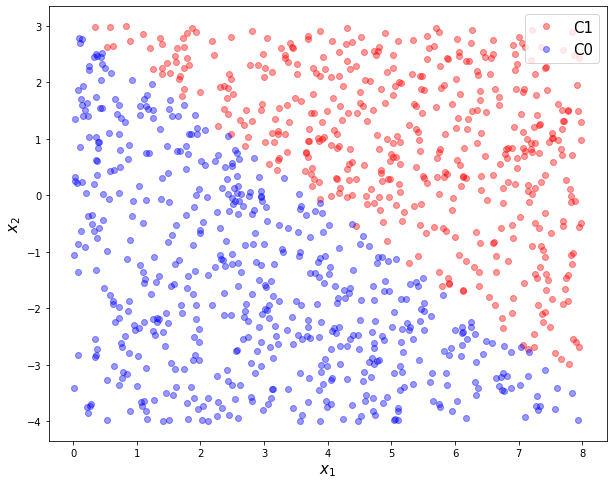

In [2]:
#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

"""
Plot as shown below

C1 = 
C0 = 

train_X = 
train_y = 

"""
C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]

N = C1.shape[0]
M = C0.shape[0]

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N, 1]), np.zeros([M, 1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [55]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, input_dim = 2, activation = 'sigmoid')
])
# 최종단의 뉴런 갯수 units = 1 (예측값, output),   bias빼고 input_dim =2 (input 인자)

In [56]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), # Adam Optimizer
                           loss = 'binary_crossentropy')

In [57]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5811
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2414
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1459
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1216
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1123
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1003


In [58]:
LogisticRegression.layers[0]

In [59]:
LogisticRegression.layers[0].get_weights()

[array([[1.8792082],
        [2.431082 ]], dtype=float32),
 array([-6.8732266], dtype=float32)]

In [60]:
w = LogisticRegression.layers[0].get_weights()[0] 
b = LogisticRegression.layers[0].get_weights()[1] 
print(w) # weight
print(b) # bias

[[1.8792082]
 [2.431082 ]]
[-6.8732266]


In [61]:
LogisticRegression.summary() # Layer, Parameter 개수 확인

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


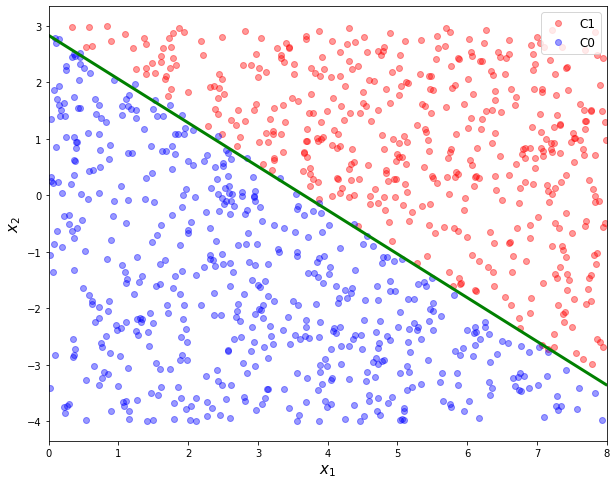

In [62]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.show()

# 4. Looking at Parameters

- To understand network's behavior


$$y = \sigma \,(b + \omega_1 x_1 + \omega_2 x_2)$$

<br><br>
<center><img src="./image_files/mlp_logistic_ann.png" width = 800></center>
<br>

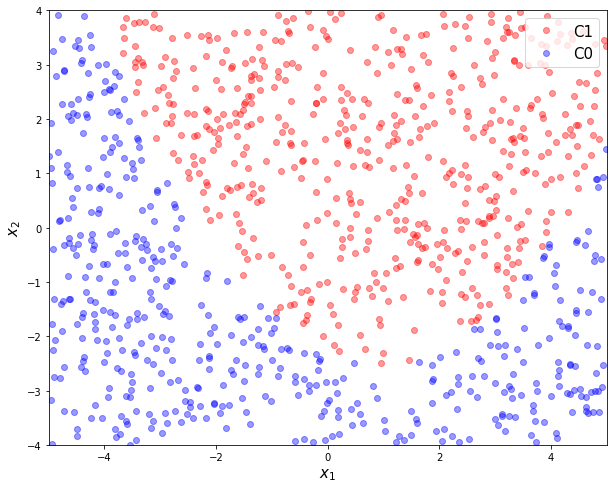

In [11]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])
# ohe = OneHotEncoder(handle_unknown='ignore')
# train_y = ohe.fit_transform(train_y).toarray()

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

In [12]:
"""
Sequential model
model structure: [2, 1]
activation function = 'sigmoid' (both layers)

"""

LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 2, input_dim = 2, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, input_dim = 2, activation = 'sigmoid')
])

In [13]:
"""
Model compile

"""
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), # Adam Optimizer
                           loss = 'binary_crossentropy')

In [14]:
"""
Model fit (train, epochs = 10)

"""
loss = LogisticRegression.fit(train_X, train_y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5071
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2162
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1679
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1072
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0972
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0956
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0998
Epoch 13/20
32/32 [==============================

In [15]:
w1 = LogisticRegression.layers[0].get_weights()[0]
b1 = LogisticRegression.layers[0].get_weights()[1]
print(w1)
print(b1)

[[ 1.5232015  3.557208 ]
 [-1.7982395  2.4359071]]
[-6.1863546  6.406733 ]


In [16]:
w2 = LogisticRegression.layers[1].get_weights()[0]
b2 = LogisticRegression.layers[1].get_weights()[1]
print(w2)
print(b2)

[[-9.953375]
 [10.345734]]
[-4.782176]


In [17]:
LogisticRegression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [18]:
a = [[1,2],
    [4,5],
    [7,8]]
#a + [[1,2]]
a + np.array([1, 2]) # np.array에서는 모든 행들에 다 더해짐

array([[ 2,  4],
       [ 5,  7],
       [ 8, 10]])

In [19]:
"""
Using weights and bias from the first layer, define H. H should be the output of logistic regression.
Use train_X to define H.

H = 
w1, b1

sigmoid(trainX*w1+b)
"""
print(train_X.shape, w1.shape, b1.shape)

H = train_X * w1 + b1 # 첫번째 layer의 w와 bias를 연산
H = 1/(1+np.exp(-H)) # sigmoid함수

#H = 1/(1+np.exp(-z))

(1000, 2) (2, 2) (2,)


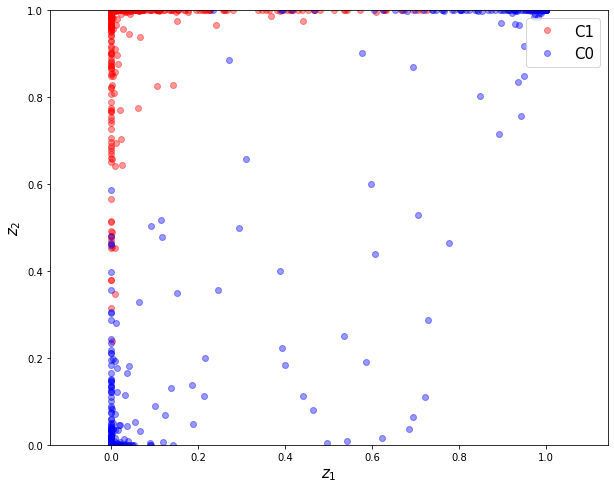

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [23]:
b2

array([-4.782176], dtype=float32)

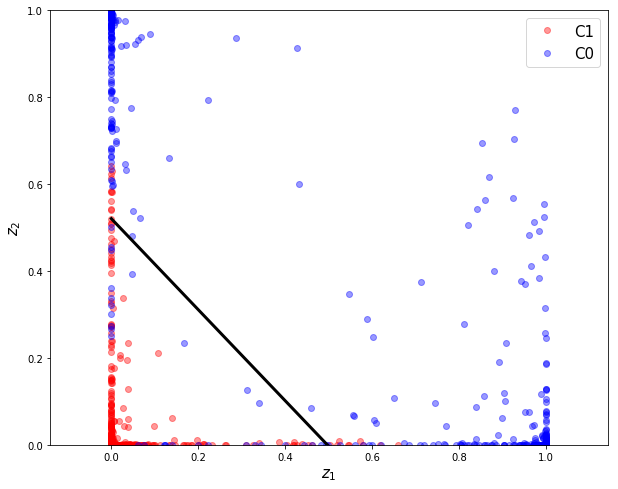

In [21]:
"""
Using weights and bias from the second layer, define x2p

x1p = 
x2p = 

"""
x1p = np.arange(0, 1, 0.01).reshape(-1,1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure(figsize=(10, 8))
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

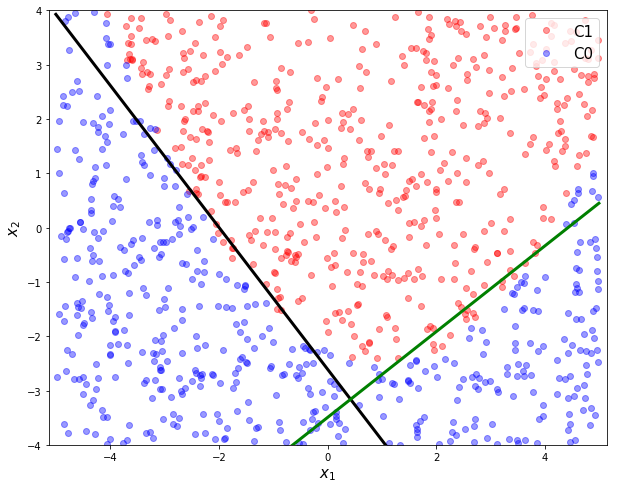

In [34]:
"""
Using weights and bias from the first layer, define x2p and x3p

x1p = 
x2p = 
x3p = 

[x1, x2][w11, w12] + [b11, b12] = [z1, z2]
        [w21, w22]

sigmoid(w11x1 + w21x2 + b11) = z1
sigmoid(w12x1 + w22x2 + b12) = z2

"""
x1p = np.arange(-5, 5, 0.01).reshape(-1,1)
x2p = - w1[0,0]/w1[1,0]*x1p - b1[0]/w1[1,0]
x3p = - w1[0,1]/w1[1,1]*x1p - b1[1]/w1[1,1]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

# 5. Artificial Neural Networks

- Complex/Nonlinear universal function approximator
    - Linearly connected networks 
    - Simple nonlinear neurons


- Hidden layers
    - Autonomous feature learning
    
<br>
<center><img src="./image_files/neural.png" width = 700></center>

<br>
<center><img src="./image_files/DNN.png" width = 700></center>

## 5.1. Training Neural Networks

$=$ Learning or estimating weights and biases of multi-layer perceptron from training data


__Loss Function__

- Measures error between target values and predictions

<br>
$$ \min_{\omega} \sum_{i=1}^{m}\ell\left( h_{\omega}\left(x^{(i)}\right),y^{(i)}\right)$$

- Example
    - Squared loss (for regression):
    $$  \frac{1}{m} \sum_{i=1}^{m} \left(h_{\omega}\left(x^{(i)}\right) - y^{(i)}\right)^2 $$
    <br>
    - Cross entropy (for classification):
    $$ -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log\left(h_{\omega}\left(x^{(i)}\right)\right) + \left(1-y^{(i)}\right)\log\left(1-h_{\omega}\left(x^{(i)}\right)\right)$$
    

__Learning__


Learning weights and biases from data using gradient descent

<br>

$$\omega \Leftarrow \omega - \alpha \nabla_{\omega} \ell \left( h_{\omega}\left(x^{(i)}\right), y^{(i)} \right)$$

<br>

__Backpropagation__

- Forward propagation 
    - the initial information propagates up to the hidden units at each layer and finally produces output


- Backpropagation
    - allows the information from the cost to flow backwards through the network in order to compute the gradients


# 6. ANN with MNIST


- MNIST (Mixed National Institute of Standards and Technology database) database
    - Handwritten digit database
    - $28 \times 28$ gray scaled image    
    
<br><br>
<center><img src="./image_files/MNIST-Matrix.png" width = 700></center>



We will be using MNIST to create a Multinomial Classifier that can detect if the MNIST image shown is a member of class 0,1,2,3,4,5,6,7,8 or 9. Susinctly, we're teaching a computer to recognize hand written digets.

Let's download and load the dataset.

In [22]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

In [23]:
print ("The training data set is:\n")
print (train_x.shape)
print (train_y.shape)

The training data set is:

(60000, 28, 28)
(60000,)


In [24]:
print ("The test data set is:")
print (test_x.shape)
print (test_y.shape)

The test data set is:
(10000, 28, 28)
(10000,)


Let's visualize what some of these images and their corresponding training labels look like.

label : 3


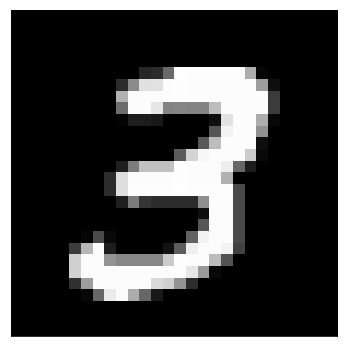

In [39]:
print('label :', train_y[7])

plt.figure(figsize = (6,6))
plt.imshow(train_x[7], 'gray') # imshow : 이미지를 불러와서 띄워줌.
plt.xticks([])
plt.yticks([])
plt.show()

- Our network model

<br>
<center><img src="./image_files/MNIST_neuralnet_image.png" width = 700></center>
<br>


In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(units = 100, input_dim = 784, activation = 'relu'),
    tf.keras.layers.Dense(units = 10, input_dim = 100, activation = 'softmax') # softmax : 확률적으로 보기 위해 사용
])
'''
relu : f(x) = max(0,x)
softmax : f(Xi) = exp(Xi)/sigma(exp(Xk)
                          k=1~n
'''
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 0,1,2,3,4 숫자로 구분하는 경우 sparse_categorical_crossentropy 사용 , 결과가 7이면 7번째 category가 확률이 제일 높다.
# one hot encoding 

# w <- w - df
# loss
loss = model.fit(train_x, train_y, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1205 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9844


In [41]:
test_loss, test_acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9771


In [57]:
test_loss

0.07904341071844101

In [58]:
test_acc

0.9771000146865845

In [68]:
test_img = test_x[1].reshape(1,-1)

predict = model.predict(test_img)

In [69]:
predict

array([[5.22284267e-07, 4.04871709e-04, 9.99572694e-01, 1.13587184e-05,
        5.48056853e-17, 1.02094746e-05, 1.03831745e-07, 2.43401718e-12,
        2.07003765e-07, 6.47202940e-13]], dtype=float32)

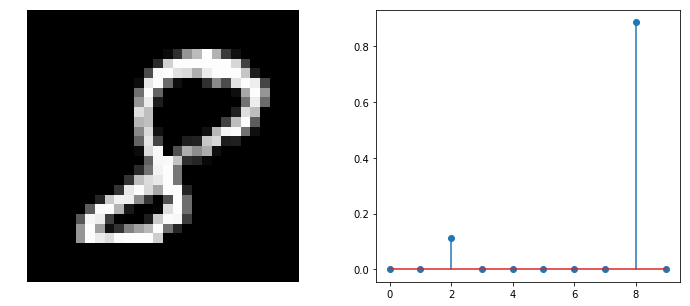

Prediction : 8


In [73]:
test_img = test_x[np.random.choice(test_x.shape[0], 1)]

predict = model.predict(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

In [29]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>